In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                   

In [6]:
history=model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 31s 45ms/step - loss: 0.1863 - accuracy: 0.9395 - val_loss: 0.0595 - val_accuracy: 0.9822
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0544 - accuracy: 0.9847 - val_loss: 0.0300 - val_accuracy: 0.9907
Epoch 3/10
469/469 [==============================] - 18s 37ms/step - loss: 0.0380 - accuracy: 0.9890 - val_loss: 0.0427 - val_accuracy: 0.9879
Epoch 4/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0348 - accuracy: 0.9904 - val_loss: 0.0367 - val_accuracy: 0.9908
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.0324 - val_accuracy: 0.9920
Epoch 6/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0242 - accuracy: 0.9934 - val_loss: 0.0278 - val_accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0266 - accuracy: 0.9927 - val_loss: 0.0278 - val_accuracy:

In [7]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0458 - accuracy: 0.9924


[0.04583601653575897, 0.9923999905586243]

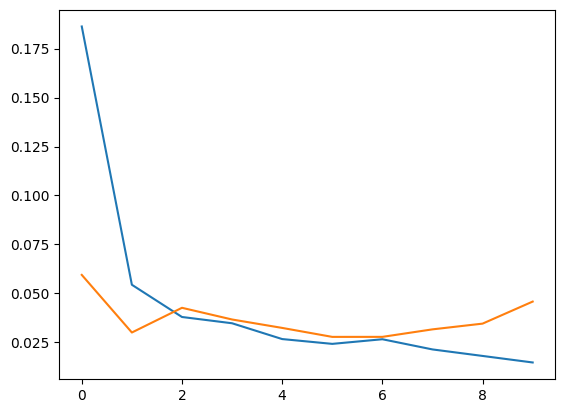

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

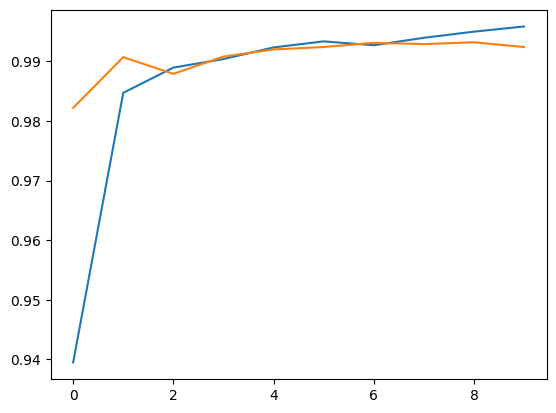

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])